DATA CREATION 

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=90)

df = pd.DataFrame({
    'Date': dates,
    'DAU': np.random.normal(800, 100, 90).astype(int),
    'New_Signups': np.random.normal(150, 30, 90).astype(int),
    'Retention_Rate': np.round(np.random.normal(0.4, 0.05, 90), 2),
    'Bug_Reports': np.random.poisson(5, 90),
    'Crash_Rate (%)': np.round(np.random.uniform(0.2, 1.5, 90), 2)
})

df.to_csv("post_launch_metrics.csv", index=False)


## Tasks:
1. Plot and analyze these key metrics:

    - Daily Active Users (DAU)
    - Retention Rate
    - Bug Reports
    - Crash Rate

2. Identify:

    - Major spikes/dips in metrics
    - Correlations (e.g., bug reports ↑ = retention ↓?)

3. Recommend:

    - 2 fixes (UX, infra, etc.)
    - 1 experiment to improve the product



In [2]:
df.head()

,Date,DAU,New_Signups,Retention_Rate,Bug_Reports,Crash_Rate (%)
0,2023-01-01,849,152,0.43,6,0.34
1,2023-01-02,786,179,0.36,4,1.24
2,2023-01-03,864,128,0.35,8,0.43
3,2023-01-04,952,140,0.42,2,1.05
4,2023-01-05,776,138,0.39,2,0.51


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            90 non-null     datetime64[ns]
 1   DAU             90 non-null     int64         
 2   New_Signups     90 non-null     int64         
 3   Retention_Rate  90 non-null     float64       
 4   Bug_Reports     90 non-null     int32         
 5   Crash_Rate (%)  90 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2)
memory usage: 4.0 KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

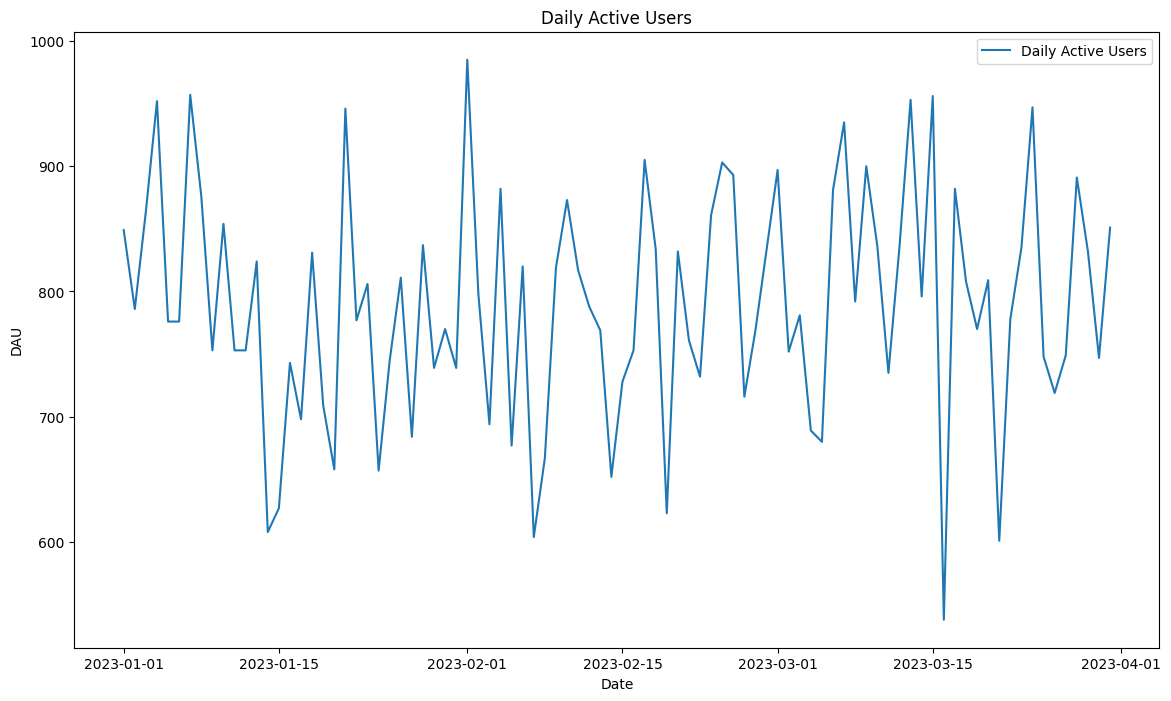

In [7]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='DAU', label='Daily Active Users')
plt.title('Daily Active Users')   
plt.show()

In [18]:
df['DAU'].describe()

count     90.000000
mean     789.666667
std       93.465249
min      538.000000
25%      739.000000
50%      787.000000
75%      850.500000
max      985.000000
Name: DAU, dtype: float64

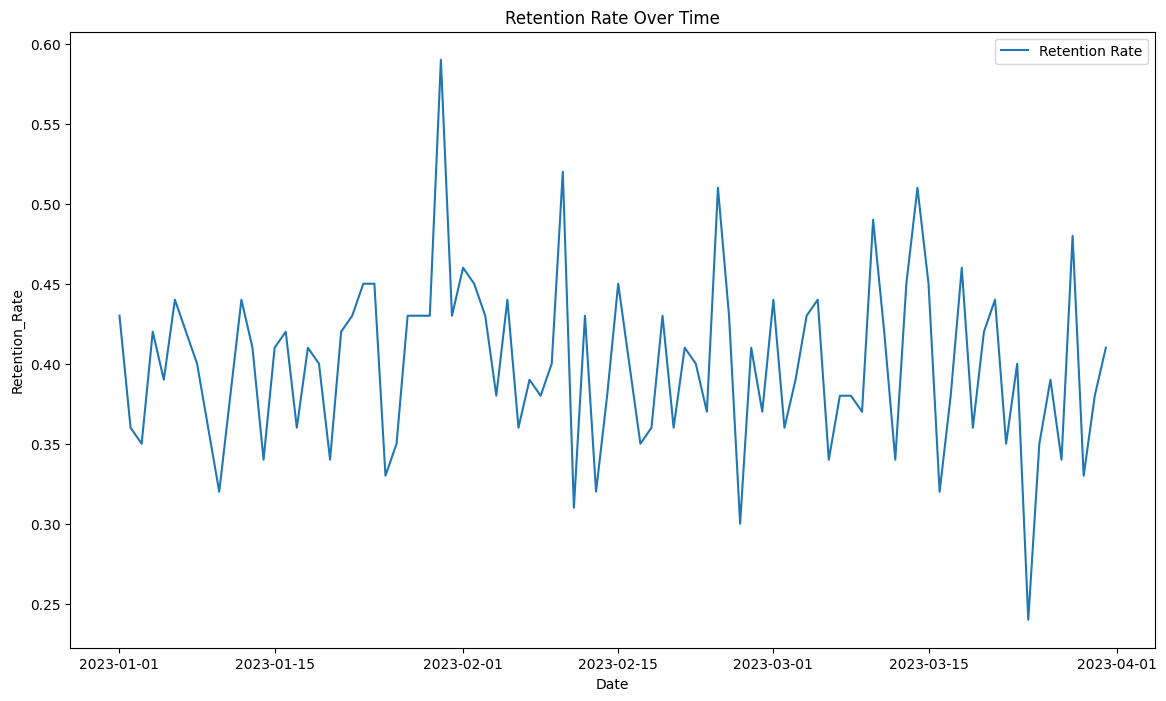

In [9]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Retention_Rate', label='Retention Rate')
plt.title('Retention Rate Over Time')
plt.show()

In [19]:
df['Retention_Rate'].describe()

count    90.000000
mean      0.399778
std       0.053653
min       0.240000
25%       0.360000
50%       0.400000
75%       0.430000
max       0.590000
Name: Retention_Rate, dtype: float64

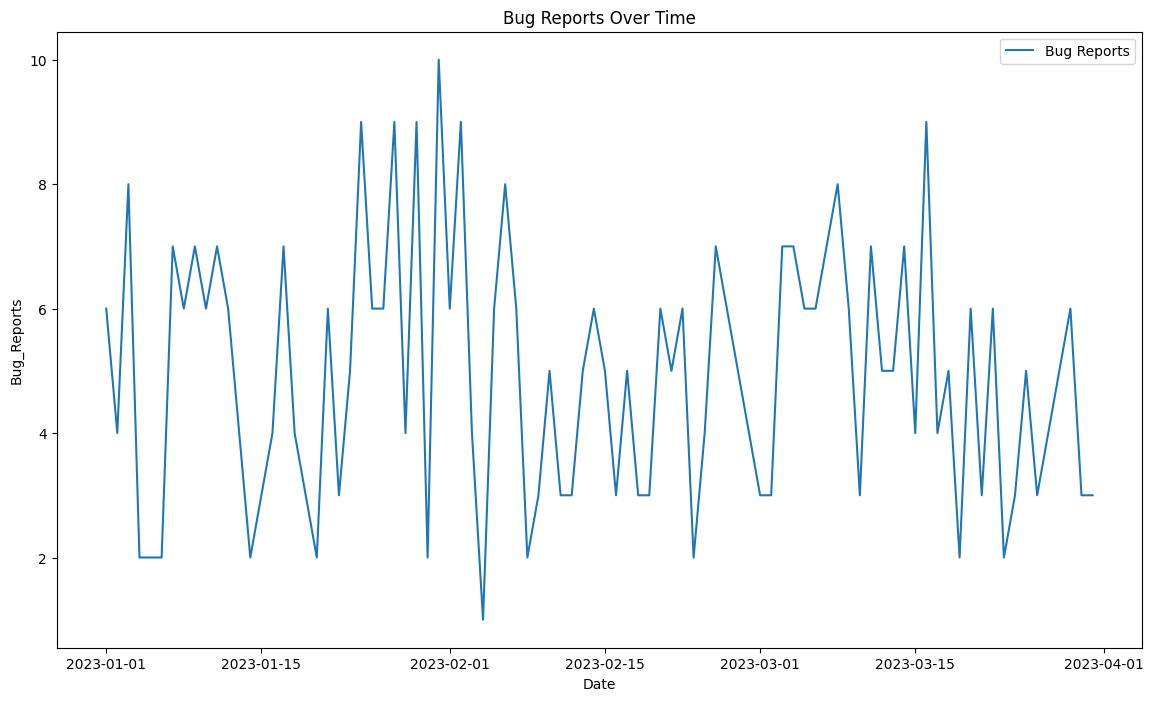

In [10]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Bug_Reports', label='Bug Reports')
plt.title('Bug Reports Over Time')
plt.show()

In [20]:
df['Bug_Reports'].describe()

count    90.000000
mean      4.944444
std       2.057385
min       1.000000
25%       3.000000
50%       5.000000
75%       6.000000
max      10.000000
Name: Bug_Reports, dtype: float64

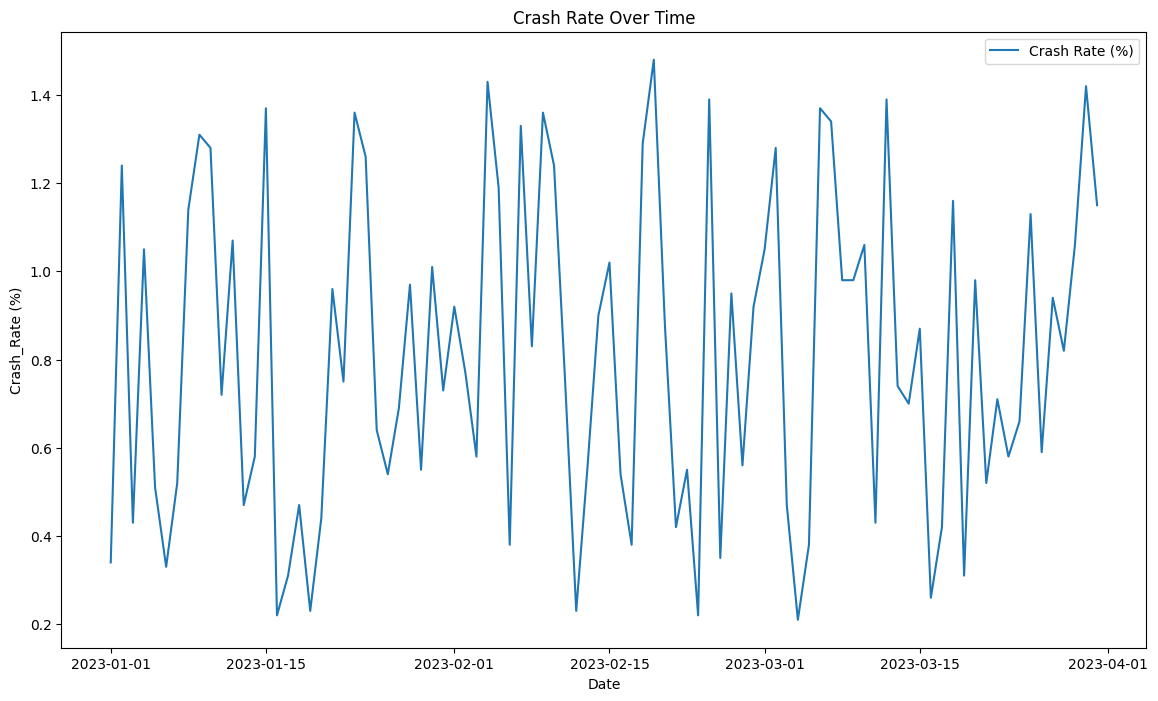

In [15]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Date', y='Crash_Rate (%)', label='Crash Rate (%)')
plt.title('Crash Rate Over Time')
plt.show()

In [21]:
df['Crash_Rate (%)'].describe()

count    90.000000
mean      0.809556
std       0.369828
min       0.210000
25%       0.512500
50%       0.760000
75%       1.115000
max       1.480000
Name: Crash_Rate (%), dtype: float64

In [35]:
# percentage of count the number of rows where Crash_Rate (%) > 0.8
df[df['Crash_Rate (%)'] > 0.8].count()['Crash_Rate (%)'] / df.shape[0] * 100

np.float64(48.888888888888886)

In [36]:
# Identify spikes/dips
df_diff = df.select_dtypes(include='number').diff().abs()
spikes = df_diff[df_diff > df_diff.mean() + 2 * df_diff.std()].dropna(how='all')
print("Significant Spikes/Dips Detected:\n", spikes.dropna(how='all'))

Significant Spikes/Dips Detected:
       DAU  New_Signups  Retention_Rate  Bug_Reports  Crash_Rate (%)
3     NaN          NaN             NaN          6.0             NaN
15    NaN          NaN             NaN          NaN            1.15
20  288.0          NaN             NaN          NaN             NaN
29    NaN          NaN            0.16          7.0             NaN
30    NaN          NaN            0.16          8.0             NaN
36    NaN         95.0             NaN          NaN             NaN
41    NaN          NaN            0.21          NaN             NaN
52    NaN         88.0             NaN          NaN             NaN
54    NaN          NaN             NaN          NaN            1.17
55    NaN          NaN             NaN          NaN            1.04
74  418.0          NaN             NaN          NaN             NaN
75  344.0          NaN             NaN          NaN             NaN
82    NaN          NaN            0.16          NaN             NaN
89    NaN    

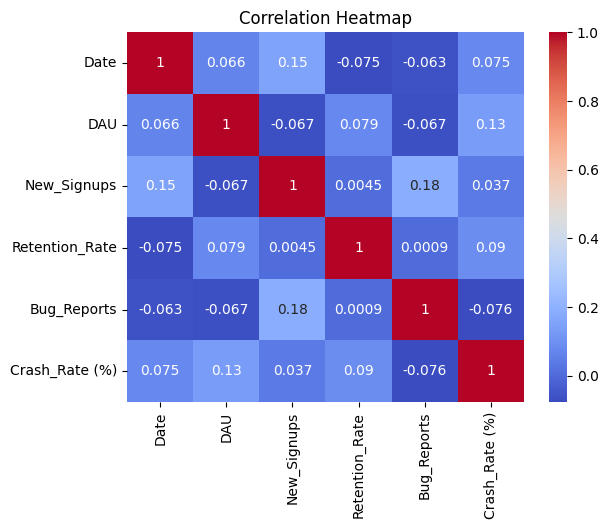

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Show correlations
plt.title('Correlation Heatmap')
plt.show()